In [1]:
import cv2
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
paths = pathlib.Path('Segments/').glob('**/*.png')

In [3]:
paths = [str(path) for path in paths]
len(paths)

197

In [4]:
sample = paths[:5]
for i in sample:
    print(i)

Segments/141.png
Segments/67.png
Segments/139.png
Segments/163.png
Segments/126.png


In [5]:
def find_green_boxes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Define the lower and upper bounds of the green color in BGR format
    lower_green = np.array([0, 100, 0], dtype="uint8")
    upper_green = np.array([80, 255, 80], dtype="uint8")

    # Create a mask to identify the green regions
    mask = cv2.inRange(image, lower_green, upper_green)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the green boxes
    green_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        green_boxes.append([x, y, x + w, y + h])

    return green_boxes


In [6]:
def plot_image_boxes(image_path):
    # Load the image
    image = mpimg.imread(image_path)
    
    # Find the green boxes
    green_boxes = find_green_boxes(image_path)
    
    # Plot the image
    plt.imshow(image)
    
    # Plot the green boxes
    for green_box in green_boxes:
        plt.plot((green_box[0], green_box[2]), (green_box[1], green_box[1]), color='red')
        plt.plot((green_box[0], green_box[2]), (green_box[3], green_box[3]), color='red')
        plt.plot((green_box[0], green_box[0]), (green_box[1], green_box[3]), color='red')
        plt.plot((green_box[2], green_box[2]), (green_box[1], green_box[3]), color='red')

    plt.axis('off')    
    plt.show()

In [7]:
def plot_image(image_path):
    # Load the image
    image = mpimg.imread(image_path)
    
    # Find the green boxes
    green_boxes = find_green_boxes(image_path)
    
    # Plot the image
    plt.imshow(image)

    plt.axis('off')    
    plt.show()

In [8]:
x = find_green_boxes(sample[4])
x

[[348, 263, 365, 277]]

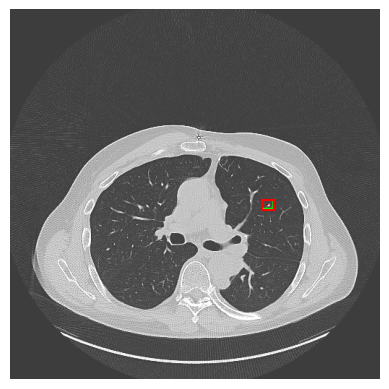

In [9]:
plot_image_boxes(sample[4])

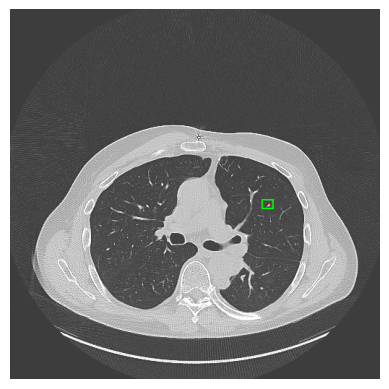

In [10]:
plot_image(sample[4])

-----

In [11]:
cordinates = []
for i in paths:
    x = find_green_boxes(i)
    cordinates.append(x)

In [12]:
for i in cordinates[:10]:
    print(i)

[[341, 213, 357, 228]]
[[221, 207, 252, 228]]
[[331, 146, 375, 211]]
[[380, 342, 395, 357]]
[[348, 263, 365, 277]]
[[238, 220, 266, 253]]
[[190, 305, 212, 336]]
[[180, 298, 201, 320]]
[[245, 127, 271, 163]]
[[129, 298, 162, 328]]


In [13]:
import pandas as pd

df = pd.DataFrame(columns = ['path', 'x1', 'y1', 'x2', 'y2'])
df.head()

,path,x1,y1,x2,y2


In [15]:
# get image name from path
def get_image_name(path):
    return path.split('/')[-1]

# sample
get_image_name(paths[2])

'139.png'

In [16]:
def populate(path, x1, y1, x2, y2):
    df.loc[len(df)] = [get_image_name(path), x1, y1, x2, y2]

for i in range(len(paths)):
    for j in cordinates[i]:
        populate(paths[i], j[0], j[1], j[2], j[3])

df.head()

,path,x1,y1,x2,y2
0,141.png,341,213,357,228
1,67.png,221,207,252,228
2,139.png,331,146,375,211
3,163.png,380,342,395,357
4,126.png,348,263,365,277


In [ ]:
df.to_csv('masks_cordinates.csv', index=False)